<a href="https://colab.research.google.com/github/ivalozkaMIIGAiK/network/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


## 1.3. Визуализируем часть данных из датасета

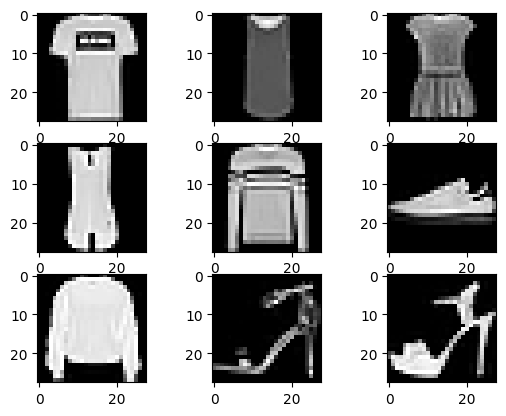

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [4]:
# 1.1. Устанавливаем необходимые зависимости
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


# 1.3. Подготовка данных
# Нормализация и добавление размерности канала
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255.0
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Преобразование меток в one-hot encoding
num_classes = 10
trainy = to_categorical(trainy, num_classes)
testy = to_categorical(testy, num_classes)

# 1.4. Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [5]:
history = model.fit(
    trainX, trainy,
    batch_size=64,
    epochs=10,
    validation_data=(testX, testy),
    verbose=1
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 65ms/step - accuracy: 0.7336 - loss: 0.7308 - val_accuracy: 0.8662 - val_loss: 0.3718
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 57ms/step - accuracy: 0.8783 - loss: 0.3353 - val_accuracy: 0.8755 - val_loss: 0.3374
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.8987 - loss: 0.2752 - val_accuracy: 0.8915 - val_loss: 0.2955
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9104 - loss: 0.2448 - val_accuracy: 0.9056 - val_loss: 0.2678
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9219 - loss: 0.2133 - val_accuracy: 0.9005 - val_loss: 0.2712
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9288 - loss: 0.1918 - val_accuracy: 0.8996 - val_loss: 0.2747
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9377 - loss: 0.1661 - val_accuracy: 0.9119 - val_loss: 0.2534
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9432 - loss: 0.1501 - 

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

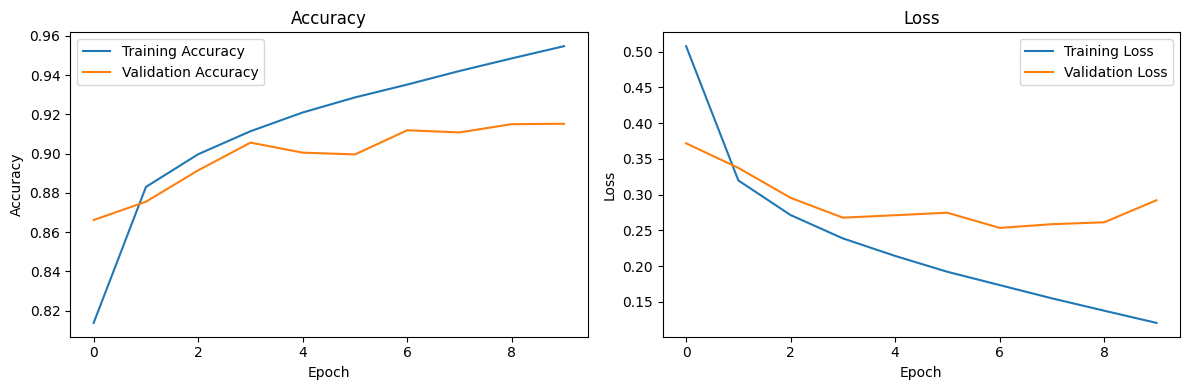

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Метки классов Fashion MNIST
class_labels = [
    'Футболка/топ', 'Брюки', 'Свитер', 'Платье', 'Пальто',
    'Сандалии', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботильоны'
]

# Функция для загрузки и подготовки изображения
def prepare_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Нормализация
    img_array = 1 - img_array  # Инверсия цветов (Fashion MNIST имеет белый фон)
    return img_array

# Пути к 5 тестовым изображениям разных классов
test_images = [
    'футболка.jpg',    # Футболка
    'брюки.jpg',   # Брюки
    'платье.jpg',     # Платье
    'кроссовки.jpg',   # Кроссовки
    'сумка.jpg'        # Сумка
]

# Создаем график для отображения результатов
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(test_images):
    try:
        # Подготовка изображения
        img_array = prepare_image(img_path)

        # Получение предсказания
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        confidence = np.max(predictions[0]) * 100

        # Визуализация
        plt.subplot(2, 3, i+1)
        img = image.load_img(img_path, target_size=(100, 100))
        plt.imshow(img, cmap='gray')
        plt.title(f'{class_labels[predicted_class]}\nУверенность: {confidence:.1f}%')
        plt.axis('off')

        # Вывод информации в консоль
        print(f"\nИзображение: {os.path.basename(img_path)}")
        print(f"Предсказанный класс: {class_labels[predicted_class]} ({confidence:.1f}%)")
        print("Распределение вероятностей:")
        for class_idx, prob in enumerate(predictions[0]):
            print(f"{class_labels[class_idx]}: {prob*100:.1f}%")

    except Exception as e:
        print(f"Ошибка при обработке {img_path}: {str(e)}")

plt.tight_layout()
plt.show()

Ошибка при обработке футболка.jpg: [Errno 2] No such file or directory: 'футболка.jpg'
Ошибка при обработке брюки.jpg: [Errno 2] No such file or directory: 'брюки.jpg'
Ошибка при обработке платье.jpg: [Errno 2] No such file or directory: 'платье.jpg'
Ошибка при обработке кроссовки.jpg: [Errno 2] No such file or directory: 'кроссовки.jpg'
Ошибка при обработке сумка.jpg: [Errno 2] No such file or directory: 'сумка.jpg'


<Figure size 1500x1000 with 0 Axes>

In [8]:
!pip install gradio
import numpy as np
import cv2
import gradio as gr
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Метки классов Fashion MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Функция для предсказания
def predict_image(img):
    # Подготовка изображения
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Конвертация в grayscale
    img = cv2.resize(img, (28, 28))  # Изменение размера
    img = np.invert(img)  # Инверсия цветов (как в Fashion MNIST)
    img = img.astype('float32') / 255.0  # Нормализация
    img = img.reshape(1, 28, 28, 1)  # Добавление размерностей

    # Загрузка модели (если не загружена)
    if 'model' not in globals():
        global model
        model = load_model('fashion_mnist_cnn.h5')

    # Получение предсказания
    preds = model.predict(img)

    # Формирование результата с процентами уверенности
    confidences = {
        class_names[i]: float(preds[0][i])
        for i in range(len(class_names))
    }

    # Визуализация обработанного изображения (для отладки)
    print("\nОбработанное изображение:")
    cv2_imshow(img[0, :, :, 0] * 255)

    return confidences

# Создание интерфейса
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(label="Загрузите изображение предмета одежды"),
    outputs=gr.Label(num_top_classes=3, label="Предсказание"),
    examples=[
        ["футболка.jpg"],
        ["брюки.jpg"],
        ["платье.jpg"],
        ["кроссовки.jpg"],
        ["сумка.jpg"]
    ],
    title="Классификатор Fashion MNIST",
    description="Загрузите изображение предмета одежды для классификации"
)

# Запуск интерфейса
interface.launch(share=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://24e2377efc3e538076.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [9]:
import kagglehub
path = kagglehub.dataset_download("ashishsaxena2209/animal-image-datasetdog-cat-and-panda")

In [11]:
import os
import random
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt

# Путь к датасету
DATASET_PATH = "/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals"
allowed_classes = ['cats', 'dogs', 'panda']

# Получение путей к изображениям
imagePaths = list(paths.list_images(DATASET_PATH))
imagePaths = [p for p in imagePaths if p.split(os.path.sep)[-2] in allowed_classes]
random.shuffle(imagePaths)

print(f"[INFO] Найдено изображений: {len(imagePaths)}")

# Загрузка изображений и меток
data = []
labels = []
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    image = image.flatten()
    data.append(image)
    labels.append(label)

# Преобразование и нормализация данных
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

# Преобразование меток в one-hot
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Разделение на обучающую и тестовую выборки
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# Улучшенная архитектура модели
model = Sequential([
    Dense(512, input_shape=(32*32*3,), activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(lb.classes_), activation="softmax")
])

# Оптимизированные параметры обучения
INIT_LR = 0.0001  # Уменьшенный learning rate
EPOCHS = 150

# Компиляция с оптимизатором AdamW (можно использовать обычный Adam)
optimizer = Adam(learning_rate=INIT_LR, weight_decay=1e-4)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Улучшенные колбэки
checkpoint = ModelCheckpoint("best_model.h5",
                           monitor='val_accuracy',
                           save_best_only=True,
                           mode='max')

early_stop = EarlyStopping(monitor='val_accuracy',
                          patience=15,  # Увеличенное терпение
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.5,
                             patience=5,
                             min_lr=1e-6)

# Обучение модели
history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=EPOCHS,
    batch_size=128,  # Увеличенный batch size
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)


[INFO] Найдено изображений: 3000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3786 - loss: 1.6281

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.3826 - loss: 1.6137 - val_accuracy: 0.3160 - val_loss: 1.3028 - learning_rate: 1.0000e-04
Epoch 2/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5107 - loss: 1.2572

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5113 - loss: 1.2541 - val_accuracy: 0.3707 - val_loss: 1.1754 - learning_rate: 1.0000e-04
Epoch 3/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5382 - loss: 1.1500

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5392 - loss: 1.1461 - val_accuracy: 0.4013 - val_loss: 1.0774 - learning_rate: 1.0000e-04
Epoch 4/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5546 - loss: 1.0670

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5567 - loss: 1.0610 - val_accuracy: 0.4160 - val_loss: 1.0729 - learning_rate: 1.0000e-04
Epoch 5/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5693 - loss: 0.9906

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5699 - loss: 0.9907 - val_accuracy: 0.4573 - val_loss: 1.0446 - learning_rate: 1.0000e-04
Epoch 6/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6011 - loss: 0.9586

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6005 - loss: 0.9579 - val_accuracy: 0.4893 - val_loss: 0.9725 - learning_rate: 1.0000e-04
Epoch 7/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6038 - loss: 0.9322

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6031 - loss: 0.9338 - val_accuracy: 0.5453 - val_loss: 0.9063 - learning_rate: 1.0000e-04
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6424 - loss: 0.8560

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6420 - loss: 0.8565 - val_accuracy: 0.5560 - val_loss: 0.8836 - learning_rate: 1.0000e-04
Epoch 9/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6438 - loss: 0.8306 - val_accuracy: 0.5267 - val_loss: 0.9281 - learning_rate: 1.0000e-04
Epoch 10/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6681 - loss: 0.8127

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6677 - loss: 0.8123 - val_accuracy: 0.5773 - val_loss: 0.8458 - learning_rate: 1.0000e-04
Epoch 11/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6330 - loss: 0.8430 - val_accuracy: 0.5720 - val_loss: 0.8464 - learning_rate: 1.0000e-04
Epoch 12/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6461 - loss: 0.7712

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6467 - loss: 0.7710 - val_accuracy: 0.5840 - val_loss: 0.8547 - learning_rate: 1.0000e-04
Epoch 13/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6628 - loss: 0.7636

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6632 - loss: 0.7643 - val_accuracy: 0.5973 - val_loss: 0.8206 - learning_rate: 1.0000e-04
Epoch 14/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6652 - loss: 0.7540

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6654 - loss: 0.7542 - val_accuracy: 0.6213 - val_loss: 0.7860 - learning_rate: 1.0000e-04
Epoch 15/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6831 - loss: 0.7099 - val_accuracy: 0.6147 - val_loss: 0.8015 - learning_rate: 1.0000e-04
Epoch 16/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6902 - loss: 0.6868 - val_accuracy: 0.6067 - val_loss: 0.8106 - learning_rate: 1.0000e-04
Epoch 17/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6900 - loss: 0.7051 - val_accuracy: 0.5947 - val_loss: 0.8023 - learning_rate: 1.0000e-04
Epoch 18/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7035 - loss: 0.6651 - val_accuracy: 0.5947 - val_loss: 0.8148 - learning_rate: 1.0000e-04
Epoch 19/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7131 - loss: 0.6614 - val_accuracy: 0.5813 - val_loss: 0.8354 - learning_rate: 1.0000e-04
Epoch 20/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7160

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7367 - loss: 0.5805 - val_accuracy: 0.6227 - val_loss: 0.8303 - learning_rate: 5.0000e-05
Epoch 25/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7251 - loss: 0.5994

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7253 - loss: 0.5994 - val_accuracy: 0.6253 - val_loss: 0.8298 - learning_rate: 2.5000e-05
Epoch 26/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7560 - loss: 0.5497 - val_accuracy: 0.6253 - val_loss: 0.8381 - learning_rate: 2.5000e-05
Epoch 27/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7569 - loss: 0.5470

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.7574 - loss: 0.5471 - val_accuracy: 0.6293 - val_loss: 0.8268 - learning_rate: 2.5000e-05
Epoch 28/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7684 - loss: 0.5573 - val_accuracy: 0.6280 - val_loss: 0.8188 - learning_rate: 2.5000e-05
Epoch 29/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7390 - loss: 0.5712 - val_accuracy: 0.6293 - val_loss: 0.8092 - learning_rate: 2.5000e-05
Epoch 30/150
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7512 - loss: 0.5375

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7512 - loss: 0.5387 - val_accuracy: 0.6347 - val_loss: 0.8109 - learning_rate: 1.2500e-05
Epoch 31/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7555 - loss: 0.5434 - val_accuracy: 0.6307 - val_loss: 0.8144 - learning_rate: 1.2500e-05
Epoch 32/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7502 - loss: 0.5974 - val_accuracy: 0.6333 - val_loss: 0.8211 - learning_rate: 1.2500e-05
Epoch 33/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7343 - loss: 0.5695 - val_accuracy: 0.6267 - val_loss: 0.8209 - learning_rate: 1.2500e-05
Epoch 34/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7705 - loss: 0.5229 - val_accuracy: 0.6307 - val_loss: 0.8200 - learning_rate: 1.2500e-05
Epoch 35/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7689 - loss: 0.5268 - val_accuracy: 0.6280 - val_loss: 0.8204 - learning_rate: 6.2500e-06
Epoch 36/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7751

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, Activation, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model

def residual_block(x, filters, kernel_size=3):
    shortcut = x

    # Основной путь
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Если размерность фильтров изменилась, преобразуем shortcut
    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, padding='same')(shortcut)  # 1x1 свёртка для изменения размерности
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Входной слой
inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)

# Блоки с остаточными связями
x = residual_block(x, 32)
x = MaxPooling2D(2)(x)
x = Dropout(0.25)(x)

x = residual_block(x, 64)  # Теперь работает!
x = MaxPooling2D(2)(x)
x = Dropout(0.25)(x)

x = residual_block(x, 128)  # И здесь тоже!
x = MaxPooling2D(2)(x)
x = Dropout(0.25)(x)

# Полносвязные слои
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(lb.classes_), activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 32, 32,    │      9,248 │ activation_3[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 32, 32,    │          0 │ add_2[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ activation_4[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 16, 16,    │          0 │ max_pooling2d_3[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 16, 16,    │     18,496 │ dropout_4[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 16, 16,    │     36,928 │ activation_5[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 16, 16,    │      2,112 │ dropout_4[0][0] 

 Total params: 834,691 (3.18 MB)

 Trainable params: 833,347 (3.18 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [14]:
# Компиляция
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Колбэки
early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Обучение
history = model.fit(
    trainX.reshape(-1, 32, 32, 3), trainY,  # Reshape для CNN
    validation_data=(testX.reshape(-1, 32, 32, 3), testY),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 732ms/step - accuracy: 0.4225 - loss: 2.2335 - val_accuracy: 0.3373 - val_loss: 1.2299 - learning_rate: 1.0000e-04
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 699ms/step - accuracy: 0.4944 - loss: 1.3624 - val_accuracy: 0.3240 - val_loss: 1.3384 - learning_rate: 1.0000e-04
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 732ms/step - accuracy: 0.5288 - loss: 0.9858 - val_accuracy: 0.3253 - val_loss: 1.3594 - learning_rate: 1.0000e-04
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 739ms/step - accuracy: 0.5588 - loss: 0.8940 - val_accuracy: 0.3307 - val_loss: 1.3508 - learning_rate: 1.0000e-04
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 744ms/step - accuracy: 0.5566 - loss: 0.8978 - val_accuracy: 0.3253 - val_loss: 1.4442 - learning_rate: 1.0000e-04
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 734ms/step - accuracy: 0.5763 - loss: 0.8580 - val_accuracy: 0.3253 - val_loss: 1.5489 - learning_rate: 1.0000e-04
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 737ms/ste

## 2.3. Сохраните полученные модели

In [17]:
model.save('animal_classifier.keras')

## 2.4. Загрузите обученную модель из прошлой практической работы


In [24]:
from tensorflow.keras.models import load_model
pred_model = load_model('/content/model.h5')
my_model = load_model('/content/animal_classifier.h5')
cnn_model = load_model('/content/best_model.h5')


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

# Классы для предсказаний
class_names = ['cat', 'dog', 'panda']

# Функция для предсказания с автоматическим определением формата входа
def predict_image(model, img_path):
    # Определяем target_size на основе input_shape модели
    if model.input_shape == (None, 3072):  # Для моделей с плоским входом
        target_size = (32, 32)  # 32x32x3=3072
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img).flatten().reshape(1, -1)
    elif model.input_shape[1:3] == (32, 32):  # Для моделей с входом 32x32x3
        target_size = (32, 32)
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
    elif model.input_shape[1:3] == (224, 224):  # Для моделей с входом 224x224x3
        target_size = (224, 224)
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
    else:
        raise ValueError(f"Неизвестный input_shape: {model.input_shape}")

    return np.argmax(model.predict(img_array))

# Получаем предсказания для всех изображений
results = []
for img_path in test_images:
    pred1 = predict_image(pred_model, img_path)
    pred2 = predict_image(my_model, img_path)
    pred3 = predict_image(cnn_model, img_path)
    results.append((img_path, pred1, pred2, pred3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

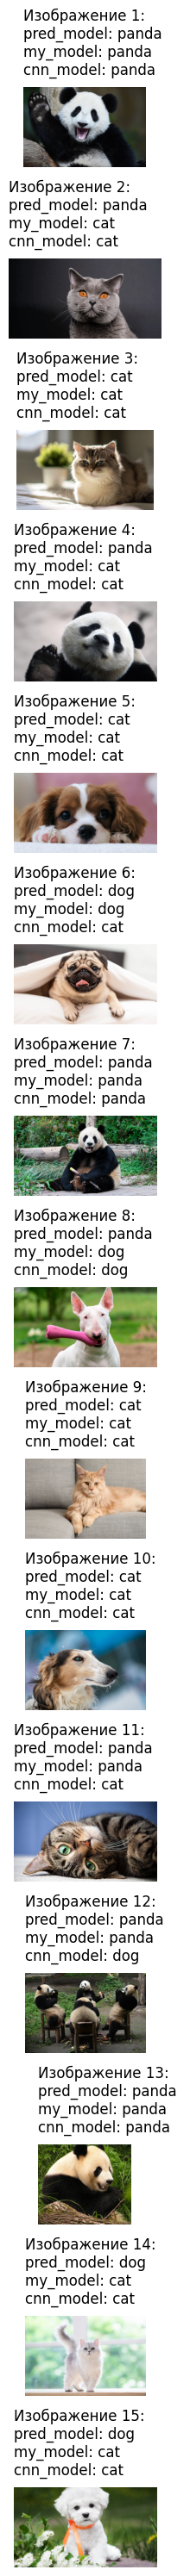

In [30]:
plt.figure(figsize=(15, 30))
for i, (img_path, pred1, pred2, pred3) in enumerate(results):
    img = Image.open(img_path)

    plt.subplot(15, 1, i+1)
    plt.imshow(img)
    plt.axis('off')


    title = (f"Изображение {i+1}:\n"
             f"pred_model: {class_names[pred1]} \n"
             f"my_model: {class_names[pred2]}\n"
             f"cnn_model: {class_names[pred3]}")

    plt.title(title, loc='left', pad=10, fontsize=12)

plt.tight_layout()
plt.show()

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [49]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [50]:
train.shape

(320, 4096)

### 3.1.2. Отрисуйте несколько примеров

TypeError: Invalid shape (4096,) for image data

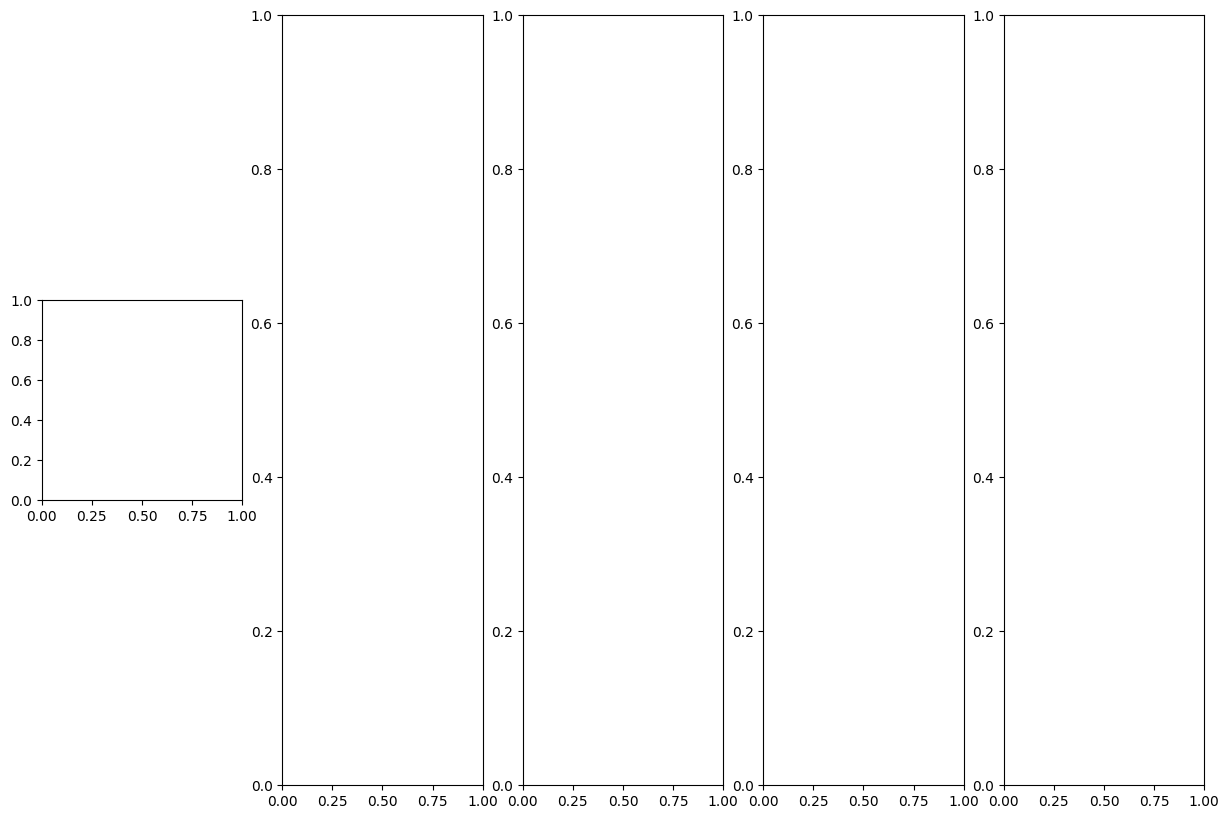

In [53]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [52]:
n_pixels = train.shape[1]

X_train = train[:, :(n_pixels + 1) // 2, :]

y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [40]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

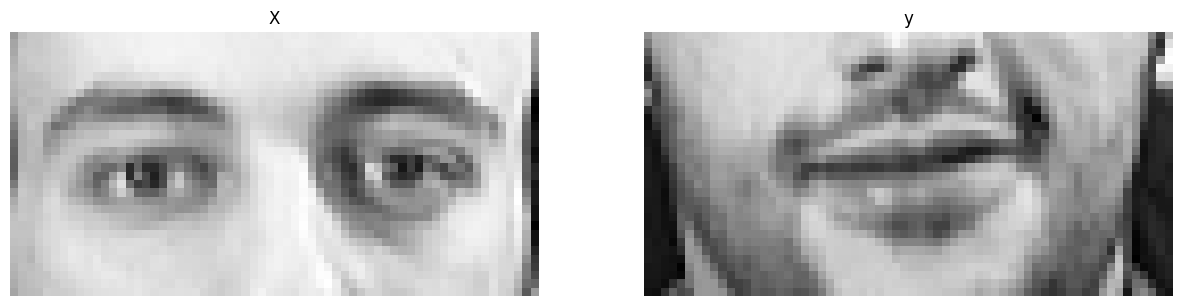

In [11]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [27]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),

    Flatten(),
    Dense(2048, activation='sigmoid')  # выход — нижняя половина (32*64=2048 пикселей)
])



model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 32, 64, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 16, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2048)           │    33,556,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,630,976 (128.29 MB)

 Trainable params: 33,630,976 (128.29 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [38]:
history = model.fit(X_train_top, Y_train_bottom, epochs=20, batch_size=32, validation_split=0.1)


NameError: name 'X_train_top' is not defined

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
# Ваш код здесь

Отрисуйте все предсказания.

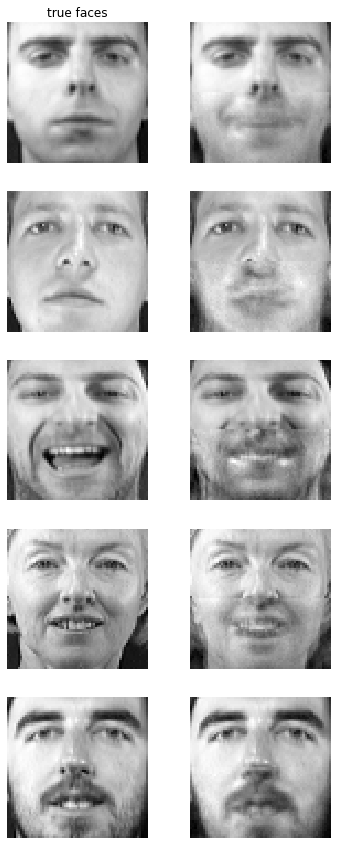

In [ ]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )